##RED NEURONAL 

In [18]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##MANDAMOS A LLAMAR LA BASE DE DATOS

In [2]:
import pandas as pd
import mysql.connector

# Conecta con la base de datos
mydb = mysql.connector.connect(
  host="hpc-matematicas-z.fciencias.unam.mx",
  user="JimmyNeutron",
  password="CarlSheen",
  database="LIMONADA"
)

# Define la consulta SQL
query = "SELECT * FROM VENTAS"

# Lee los datos de la base de datos y crea un DataFrame
df = pd.read_sql(query, mydb)

# Ahora puedes trabajar con los datos del DataFrame
# por ejemplo, mostrar las primeras filas
print(df.head())



   id_venta  fin_semana  soleado  caluroso  quincena  precio  vendidos
0         1           1        0         0         1     9.0      71.0
1         2           1        1         1         0    10.0     137.0
2         3           0        1         0         0    10.0       0.0
3         4           1        0         0         1     6.0     107.0
4         5           1        0         0         1     8.0      80.0


C:\Users\danie\AppData\Local\Temp\ipykernel_22192\793177379.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


##PASAMOS A ESTANDARIZAR

In [3]:
# Calcule la media y la desviación estándar de la columna de precios, luego estandarice la columna de precios 

precioMean = df['precio'].mean() 
precioStd = df['precio'].std() 
df['precio'] = (df ['precio']-precioMean)/precioStd 
 
#print("la media es:",precioMean ,"de precio")
#print("la varianza es:",precioStd ,"de precio")

# Calcula la media y la desviación estándar de la columna numSold, luego estandariza numSold 
vendidosMean = df['vendidos'].mean() 
vendidosStd = df['vendidos'].std() 
df ['vendidos'] = (df['vendidos']-vendidosMean)/vendidosStd

#print("la media es:",vendidosMean,"de vendidos")
#print("la varianza es:",vendidosStd,"de vendidos")

In [7]:
df.head()

,id_venta,fin_semana,soleado,caluroso,quincena,precio,vendidos
0,1,1,0,0,1,0.846650,-0.023669
1,2,1,1,1,0,1.452587,0.743734
2,3,0,1,0,0,1.452587,-0.849208
3,4,1,0,0,1,-0.971158,0.394915
4,5,1,0,0,1,0.240714,0.080977


In [19]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Crear tensores PyTorch y pasar a CPU o GPU si está disponible
import torch

# Configurar el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Cree nuestros tensores PyTorch y pase a CPU o GPU si está disponible 
# Extraiga las entradas y cree un tensor PyTorch x (entradas) 
inputs = ['fin_semana', 'soleado', 'caluroso', 'quincena', 'precio'] 
x = torch.tensor(df[inputs].values,dtype=torch.float, device=device) 

# Extrae las salidas y crea un tensor PyTorch y (outputs) 
outputs = ['vendidos'] 
y = torch.tensor(df[ outputs].values,dtype=torch.float, device=device) 


In [11]:
# Explorar las primeras 5 entradas 
x[0:5] 

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

In [12]:
# Explorar las primeras 5 salidas 
y[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]])

##ELABORACION DE RED NEURONAL


In [13]:
import torch
import torch.nn as nn

# Defina su red neuronal PyTorch 
# Número de entradas: 5 
# Número de unidades ocultas: 100 
# Número de capas ocultas: 1 
# Función de activación: Relu 
# Número de salidas: 1 

model = nn.Sequential( 
            nn.Linear(5,100), 
            nn.ReLU(), 
            nn.Linear(100,1) 
        ) 

# Muévalo a la CPU o GPU dependiendo de lo que tengamos disponible 
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

##ENTRENAMIENTO

In [14]:
import torch.optim as optim 

# Medir nuestra red neuronal según el 
criterio=torch.nn.MSELoss()

# Entrenar nuestra red con un optimizador SGD simple Optimizer 
optimizar = optim.SGD(model.parameters(), lr=0.01, momentum =0.9) 

# Entrenar nuestra red a usando el conjunto de datos completo 5 veces 
for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):
       # Single Forward Pass
        ypred = model(x[i])
        # Medir qué tan bien predijo el modelo frente al valor real 
        loss = criterio(ypred, y[i]) 

        # Realizar un seguimiento de qué tan bien predijo el modelo (llamado pérdida) 
        totalLoss+=loss.item() 

        # Actualizar la red neuronal
        optimizar.zero_grad() 
        loss.backward() 
        optimizar.step() 

    # Imprime nuestra pérdida después de cada iteración de entrenamiento 
    print ("Pérdida total: ",totalLoss )

Pérdida total:  157.41569063617925
Pérdida total:  9.934644993570931
Pérdida total:  4.8767688183523745
Pérdida total:  3.299582062849134
Pérdida total:  2.5407380737556053


In [20]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##MEDICION DE RENDIMIENTO

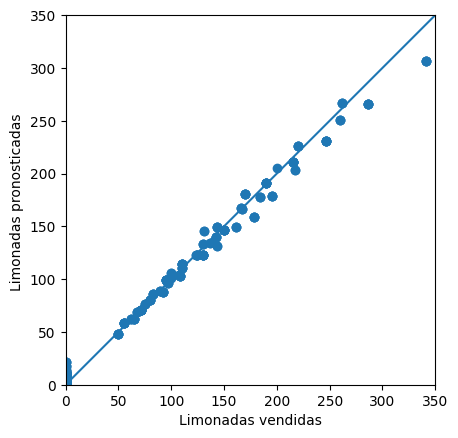

In [16]:
import matplotlib.pyplot as plt
# Graficar predicciones vs. valores verdaderos 
@torch.no_grad() 
def prediccion_grafica(model, x, y , minValue, maxValue): 
    model.eval() 
    # Establecer el modelo en modo de inferencia 

    predicciones=[] 
    # Seguir predicciones 
    actual=[] 
    # Rastree las etiquetas reales 

    x.to(device) 
    y.to(device) 
    model.to(device) 

    for i in range(len(x)): 
        # Paso único hacia adelante 
        pred = model(x[i])                                
        
        # Des- normalizar nuestra predicción 
        pred = pred*vendidosStd+vendidosMean 
        act = y[i]*vendidosStd+vendidosMean 

        # Guardar predicción y etiqueta real
        predicciones.append(pred.tolist()) 
        actual.append(act.item()) 

    # Trazar datos reales vs predicciones   
    plt.scatter(actual, predicciones) 
    plt.xlabel('Limonadas vendidas') 
    plt.ylabel('Limonadas pronosticadas ') 
    plt.plot([minValue,maxValue], [minValue,maxValue]) 
    plt.xlim(minValue, maxValue) 
    plt.ylim(minValue, maxValue) 

    # Hacer que la visualización sea igual en ambas dimensiones 
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show() 

prediccion_grafica(model, x, y, 0, 350)

##PREDICCIONES PROPIAS


In [17]:
# A continuación, usamos la fórmula del generador de datos sintéticos para
# determinar cuál debería haber sido el resultado real.
def datasetGenerator(fin_semana, soleado, calido, quincena, precio):
    num_limonadasV = 0
    if fin_semana:
        num_limonadasV = (soleado * 5 + int(500 / precio))
        if quincena:
            num_limonadasV = 1.3 * num_limonadasV
        if calido:
            num_limonadasV = 2 * num_limonadasV
        if soleado:
            num_limonadasV = 1.25 * num_limonadasV
    num_limonadasV = int(num_limonadasV)

    return num_limonadasV


# Datos que afectan la cantidad de limones vendidos en un día
fin_semana = 1
soleado = 0
calido = 0
quincena = 1
precio = 5

# Calcule cuál hubiera sido el resultado real usando
# el algoritmo del conjunto de datos sintético
actual = datasetGenerator(fin_semana, soleado, calido, quincena, precio)

# Use la CPU ya que solo necesitamos hacer un cálculo único
model.to('cpu')

# Normalizar nuestras entradas usando los mismos valores para nuestro entrenamiento
precio = (precio - precioMean) / precioStd

# Crear nuestro tensor de entrada
x1 = torch.tensor([fin_semana, soleado, calido, quincena, precio], dtype=torch.float)

# Pasar la entrada a la red neuronal
y1 = model(x1)

# Desnormalizar nuestra salida y1
y1 = y1 * vendidosStd + vendidosMean

# Comparar lo que su red predijo con el resultado real
print("Neural Network Predicts:", y1.item())
print("Resultado real:", actual)


Neural Network Predicts: 132.8534393310547
Resultado real: 130
